<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None
   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

Missing values before handling:
 label    0
tweet    0
dtype: int64

Missing values after handling:
 label    0
tweet    0
dtype: int64


[nltk_data] Downloading package vader_lexicon to C:\Users\DELL
[nltk_data]     G15\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


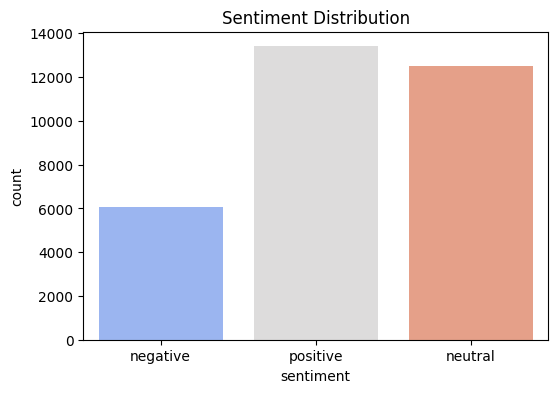

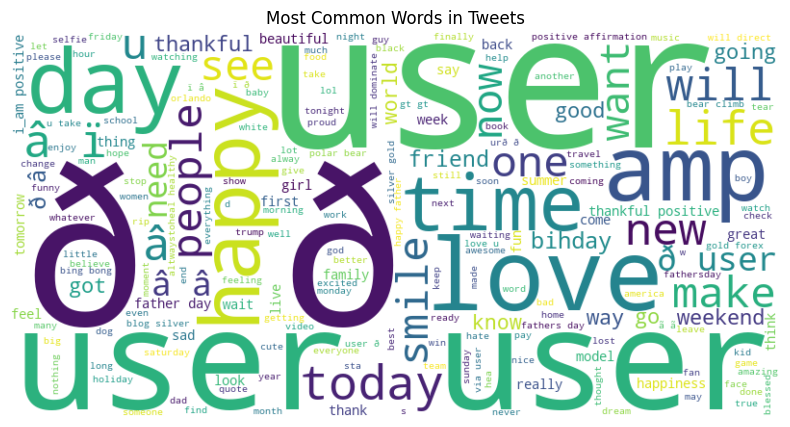


Sentiment analysis and visualization completed successfully.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the Twitter sentiment dataset
df = pd.read_csv("https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv")

# Display basic info about the dataset
print(df.info())
print(df.head())

# Drop unnecessary columns
df.drop(columns=['id'], inplace=True)

# Handling missing values
print("\nMissing values before handling:\n", df.isnull().sum())
df.dropna(inplace=True)
print("\nMissing values after handling:\n", df.isnull().sum())

# Initialize Sentiment Intensity Analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df['compound'] = df['tweet'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df, hue='sentiment', palette='coolwarm', legend=False)
plt.title('Sentiment Distribution')
plt.show()

# WordCloud for most common words
from wordcloud import WordCloud

text = " ".join(review for review in df['tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Common Words in Tweets')
plt.show()

# Sentiment Trends Over Time (if timestamp available)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df.resample('M')['compound'].mean().plot(kind='line', figsize=(10, 5), title='Sentiment Trends Over Time')
    plt.show()

print("\nSentiment analysis and visualization completed successfully.")
